In [48]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


In [49]:
fashion_minist=tf.keras.datasets.fashion_mnist
(train_images,train_lables),(test_images,test_lables)=fashion_minist.load_data()

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
train_images=train_images/255.0
test_images=test_images/255.0

In [52]:
train_images.shape
train_lables.shape

(60000,)

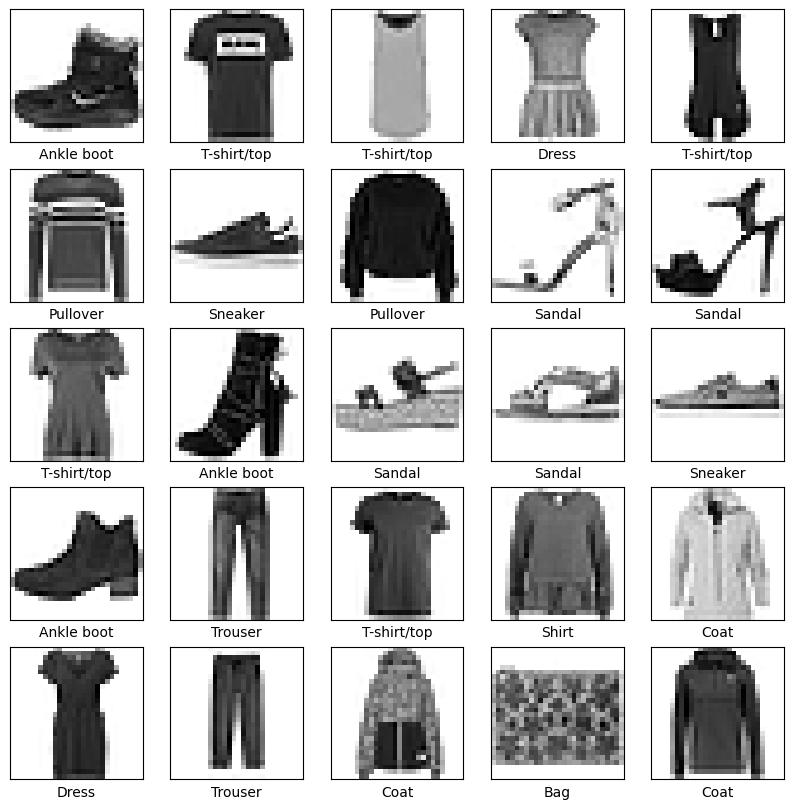

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()    

In [54]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])

In [55]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.fit(train_images,train_lables,epochs=10)

Epoch 1/10


C:\Users\rkkab\AppData\Roaming\Python\Python311\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4972 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3763 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3135 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2795 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2482 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2372 - accurac

In [57]:
trai_loss,train_accy=model.evaluate(train_images,train_lables,verbose=2) 
print(train_accy)

1875/1875 - 5s - loss: 0.2278 - accuracy: 0.9158 - 5s/epoch - 3ms/step
0.9158499836921692


In [58]:
prediction=model.predict(test_images)
prediction[23]

313/313 [==============================] - 1s 3ms/step


array([1.9399101e-06, 1.3025062e-09, 4.7666833e-07, 1.6167324e-11,
       4.5278412e-08, 9.5957547e-01, 1.9232822e-07, 1.0943541e-03,
       3.4499358e-06, 3.9324086e-02], dtype=float32)

In [59]:
np.argmax(prediction[23])

5

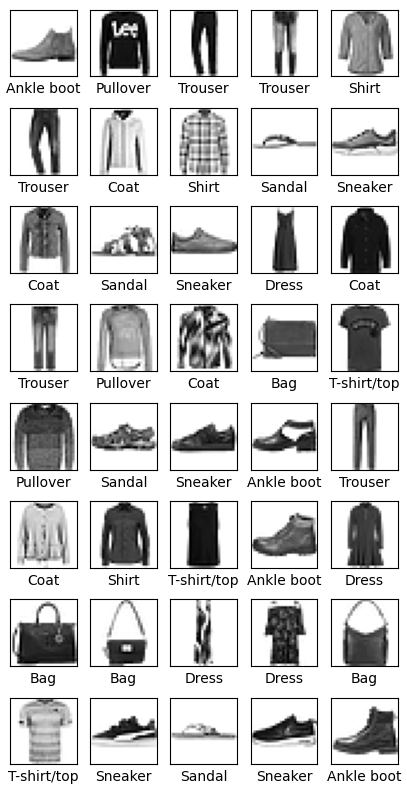

In [60]:
plt.figure(figsize=(5,10))
for i in range(40):
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_lables[i]])
plt.show()


In [61]:
test_lables[23]

9

In [62]:
def plot_image(i,prediction_array,true_lables,img):
    true_lables, img= true_lables[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_lable=np.argmax(prediction_array)
    if predicted_lable == true_lables:
        color='blue'
    else:
        color='red'    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_lable],
                                        100*np.max(prediction_array),
                                        class_names[true_lables]),
                                        color=color)
def plot_value_array(i,prediction_array,true_lables):
    true_lables = true_lables[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),prediction_array,color='#777777')
    plt.ylim([0,1])
    predicted_lable=np.argmax(prediction_array)
    thisplot[predicted_lable].set_color('red')    
    thisplot[true_lables].set_color('blue')


    





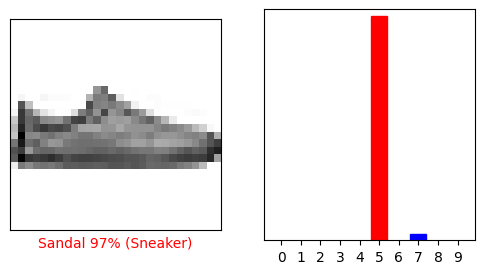

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_lables)
plt.show()

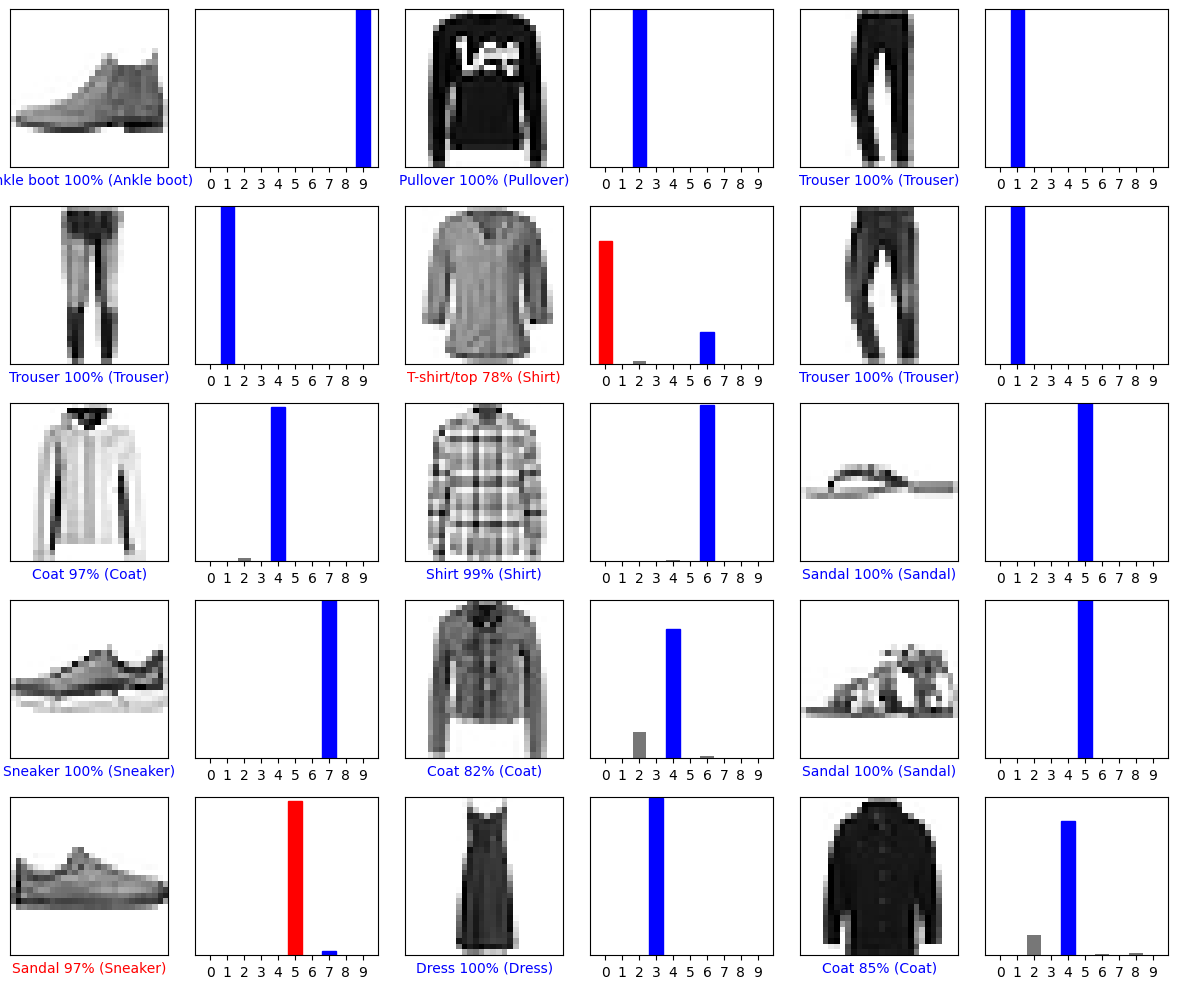

In [64]:
num_rows=5
num_columns=3
total_image=num_rows*num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))
for i in range (total_image):
    plt.subplot(num_rows,2*num_columns,2*i+1)
    plot_image(i,prediction[i],test_lables,test_images)
    plt.subplot(num_rows,2*num_columns,2*i+2)
    plot_value_array(i,prediction[i],test_lables)
plt.tight_layout()
plt.show()
